In [2]:
from scipy.signal import spectrogram
from matplotlib import pyplot as plt
import numpy as np
import torch
from src.util.signals import load_file_pair

In [3]:
def plot_spectrogram(axis, signal, signal2=None):
    frequencies, times, Sxx = spectrogram(signal.squeeze(0), 16000, nfft=1024)
    if signal2 is not None:
        frequencies, times, Sxx2 = spectrogram(signal2.squeeze(0), 16000, nfft=1024)
        print(np.mean((Sxx-Sxx2)**2))
    im = axis.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
    axis.set_yscale('log', base=2)
    axis.set_ylim([32, 8000])

    return im


Computing lag for samples/dsasegan/task_1_level_1_enhanced_005.wav
Computing lag for samples/dsasegan/task_1_level_3_enhanced_003.wav
Computing lag for samples/dsasegan/task_1_level_5_enhanced_005.wav
Computing lag for samples/dsasegan/task_1_level_7_enhanced_004.wav


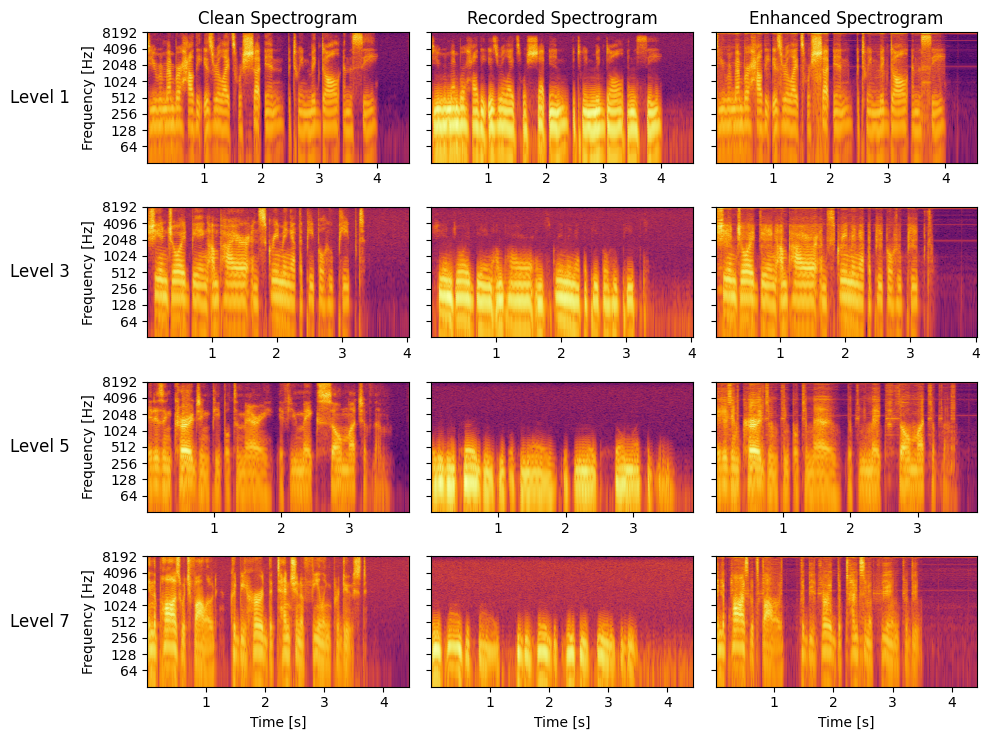

In [24]:
from matplotlib.ticker import ScalarFormatter


fig, axes = plt.subplots(4, 3, figsize=(10, 7.5), sharey=True)
base_path = "samples"


def plot_row(
    axes,
    clean_file,
    recorded_file,
    enhanced_file,
    task_label,
    first_row=False,
    last_row=False,
):
    # Calculate bounds
    clean_signal, recorded_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/recorded/{recorded_file}.wav")
    )
    row_nonzero = clean_signal.abs() > 0
    nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
    bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

    # Plot spectograms
    plot_spectrogram(axes[0], clean_signal[:, bounds[0] : bounds[1]])
    plot_spectrogram(axes[1], recorded_signal[:, bounds[0] : bounds[1]])

    _, enhanced_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/{enhanced_file}.wav")
    )
    plot_spectrogram(axes[2], enhanced_signal[:, bounds[0] : bounds[1]])

    axes[0].annotate(
        task_label,
        xy=(0, 0.5),
        xytext=(-axes[0].yaxis.labelpad - 5, 0),
        xycoords=axes[0].yaxis.label,
        textcoords="offset points",
        size="large",
        ha="right",
        va="center",
    )
    axes[0].set_ylabel("Frequency [Hz]")

    if first_row:
        axes[0].set_title("Clean Spectrogram")
        axes[1].set_title("Recorded Spectrogram")
        axes[2].set_title("Enhanced Spectrogram")

    if last_row:
        axes[0].set_xlabel("Time [s]")
        axes[1].set_xlabel("Time [s]")
        axes[2].set_xlabel("Time [s]")


plot_row(
    axes[0],
    "task_1_level_1_clean_005",
    "task_1_level_1_recorded_005",
    "dsasegan/task_1_level_1_enhanced_005",
    "Level 1",
    first_row=True,
)

plot_row(
    axes[1],
    "task_1_level_3_clean_003",
    "task_1_level_3_recorded_003",
    "dsasegan/task_1_level_3_enhanced_003",
    "Level 3",
)

plot_row(
    axes[2],
    "task_1_level_5_clean_005",
    "task_1_level_5_recorded_005",
    "dsasegan/task_1_level_5_enhanced_005",
    "Level 5",
)

plot_row(
    axes[3],
    "task_1_level_7_clean_004",
    "task_1_level_7_recorded_004",
    "dsasegan/task_1_level_7_enhanced_004",
    "Level 7",
    last_row=True,
)
for axis in axes.flatten():
    axis.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    axis.yaxis.set_major_formatter(ScalarFormatter())  # Use scalar formatter
    axis.yaxis.get_major_formatter().set_scientific(False) 
plt.tight_layout()

# fig.suptitle("Diffusion-SASEGAN Results for the Filtering Task", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for the suptitle
plt.show()

## Comparison of clean and recorded pair

Computing lag for samples/recorded/swept_sine_wave_task_1_level_1.wav


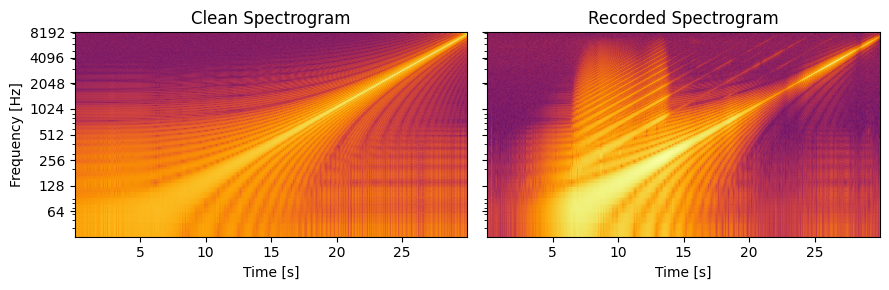

In [16]:
from matplotlib.ticker import ScalarFormatter


fig, axes = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
base_path = "samples"

clean_signal, recorded_signal = load_file_pair(
    ["samples/clean/swept_sine_wave.wav", "samples/recorded/swept_sine_wave_task_1_level_1.wav"],
    align=True
)
row_nonzero = clean_signal.abs() > 0
nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

plot_spectrogram(axes[0], clean_signal[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[1], recorded_signal[:, bounds[0] : bounds[1]])

axes[0].set_ylabel("Frequency [Hz]")
axes[0].set_xlabel("Time [s]")
# axes[1].set_ylabel("Frequency [Hz]")
axes[1].set_xlabel("Time [s]")
axes[0].set_title("Clean Spectrogram")
axes[1].set_title("Recorded Spectrogram")
axes[1].set_yscale('log')
#fig.suptitle("Repeating Patterns", fontsize=16, y=0.98)
for axis in axes:
    axis.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    axis.yaxis.set_major_formatter(ScalarFormatter())  # Use scalar formatter
    axis.yaxis.get_major_formatter().set_scientific(False) 
plt.tight_layout()
plt.show()

## All tasks

In [6]:
clean_signal, recorded_signal1 = load_file_pair(
    ["samples/clean/swept_sine_wave.wav", "samples/recorded/swept_sine_wave_task_1_level_1.wav"],
    align=True
)
_, recorded_signal2 = load_file_pair(
    ["samples/clean/swept_sine_wave.wav", "samples/recorded/swept_sine_wave_task_2_level_1.wav"],
    align=True
)
row_nonzero = clean_signal.abs() > 0
nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

Computing lag for samples/recorded/swept_sine_wave_task_1_level_1.wav
Computing lag for samples/recorded/swept_sine_wave_task_2_level_1.wav


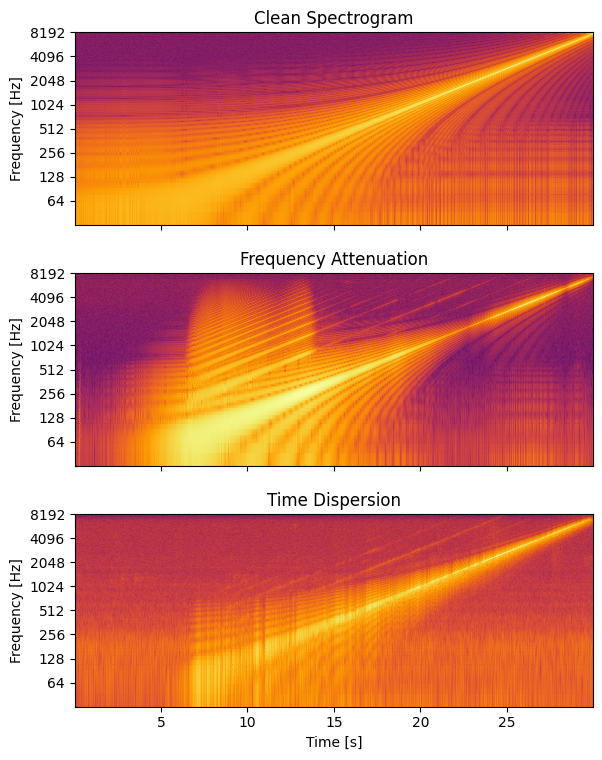

In [18]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(3, 1, figsize=(6, 7), sharex=True)

im = plot_spectrogram(axes[0], clean_signal[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[1], recorded_signal1[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[2], recorded_signal2[:, bounds[0] : bounds[1]])

axes[0].set_ylabel("Frequency [Hz]")
axes[1].set_ylabel("Frequency [Hz]")
axes[2].set_ylabel("Frequency [Hz]")
axes[2].set_xlabel("Time [s]")
axes[0].set_title("Clean Spectrogram")
axes[1].set_title("Frequency Attenuation")
axes[2].set_title("Time Dispersion")
# fig.suptitle("Helsinki Speech Challenge Dataset Sample", fontsize=14, y=1.07)
plt.tight_layout(rect=[0, 0, 1, 1.1])  # Leave space for the suptitle
for axis in axes:
    # axis.text(31, 400, 'Clean Spectogram', rotation=-90, ha='right', va='center')
    axis.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    axis.yaxis.set_major_formatter(ScalarFormatter())  # Use scalar formatter
    axis.yaxis.get_major_formatter().set_scientific(False) 

#cbar = fig.colorbar(im, ax=axes, orientation='vertical', shrink=0.7, label='Intensity [dB]')

#plt.tight_layout()
plt.show()

## Comparison of generators for one sample

Computing lag for samples/dsegan/task_1_level_5_enhanced_005.wav
Computing lag for samples/sasegan/task_1_level_5_enhanced_005.wav
Computing lag for samples/dsasegan/task_1_level_5_enhanced_005.wav
4.6747206e-15
3.8678286e-15


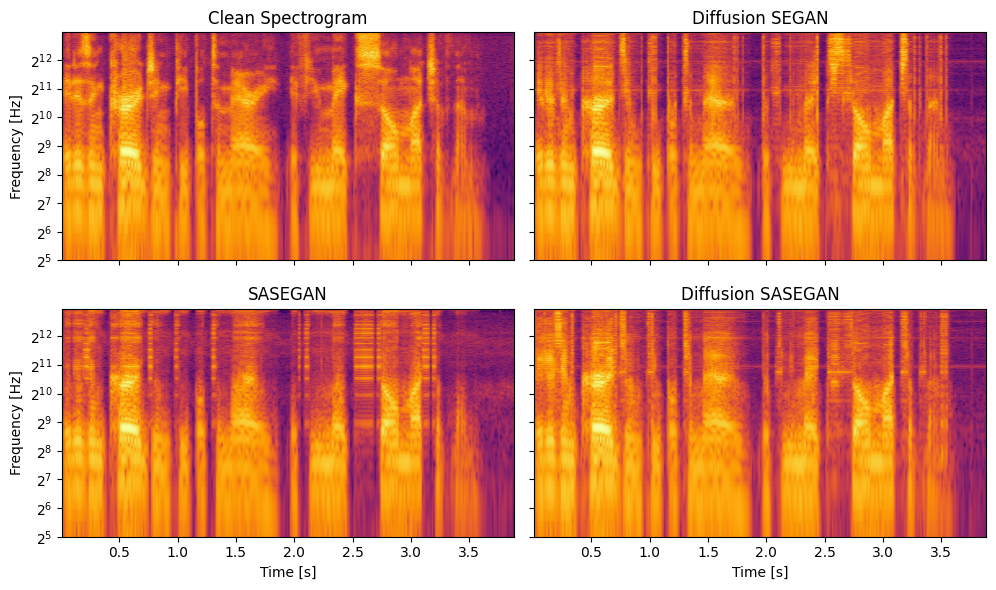

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)
base_path = "samples"

clean_file = 'task_1_level_5_clean_005'
recorded_file = 'task_1_level_5_recorded_005.wav'
enhanced_file = 'task_1_level_5_enhanced_005.wav'

clean_signal, recorded_signal = load_file_pair(
    [f"samples/clean/{clean_file}.wav", f"samples/recorded/{recorded_file}"])

_, segan_signal = load_file_pair(
    [f"samples/clean/{clean_file}.wav", f"samples/dsegan/{enhanced_file}"]
)

_, dsegan_signal = load_file_pair(
    [f"samples/clean/{clean_file}.wav", f"samples/sasegan/{enhanced_file}"]
)

_, dsasegan_signal = load_file_pair(
    [f"samples/clean/{clean_file}.wav", f"samples/dsasegan/{enhanced_file}"]
)

row_nonzero = clean_signal.abs() > 0
nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

plot_spectrogram(axes[0,0], clean_signal[:, bounds[0] : bounds[1]])
#plot_spectrogram(axes[1], recorded_signal[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[0,1], segan_signal[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[1,0], dsegan_signal[:, bounds[0] : bounds[1]], segan_signal[:, bounds[0] : bounds[1]])
plot_spectrogram(axes[1,1], dsasegan_signal[:, bounds[0] : bounds[1]], segan_signal[:, bounds[0] : bounds[1]])

axes[0,0].set_ylabel("Frequency [Hz]")
axes[1,0].set_ylabel("Frequency [Hz]")
axes[1,0].set_xlabel("Time [s]")
axes[1,1].set_xlabel("Time [s]")

axes[0,0].set_title("Clean Spectrogram")
axes[0,1].set_title("Diffusion SEGAN")
axes[1,0].set_title("U-Net")
axes[1,1].set_title("Diffusion SASEGAN")

#fig.suptitle("Model Comparison", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.5])  # Leave space for the suptitle

plt.tight_layout()
plt.show()

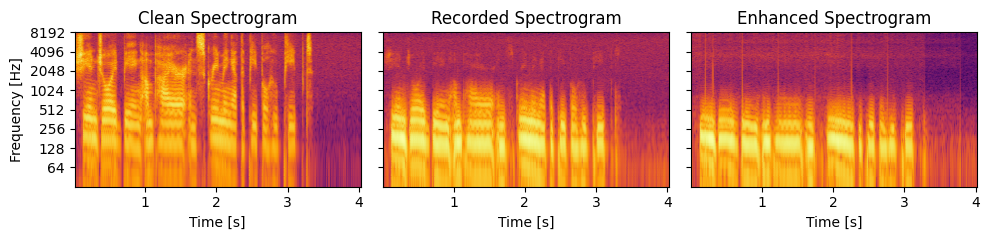

In [32]:
from matplotlib.ticker import ScalarFormatter


fig, axes = plt.subplots(3, 3, figsize=(10, 2.5), sharey=True)
base_path = "samples"


def plot_row(
    axes,
    clean_file,
    recorded_file,
    enhanced_file,
    task_label,
    first_row=False,
    last_row=False,
):
    # Calculate bounds
    clean_signal, recorded_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/recorded/{recorded_file}.wav")
    )
    row_nonzero = clean_signal.abs() > 0
    nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
    bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

    # Plot spectograms
    plot_spectrogram(axes[0], clean_signal[:, bounds[0] : bounds[1]])
    plot_spectrogram(axes[1], recorded_signal[:, bounds[0] : bounds[1]])

    _, enhanced_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/{enhanced_file}.wav")
    )
    plot_spectrogram(axes[2], enhanced_signal[:, bounds[0] : bounds[1]])

    axes[0].set_ylabel("Frequency [Hz]")

    if first_row:
        axes[0].set_title("Clean Spectrogram")
        axes[1].set_title("Recorded Spectrogram")
        axes[2].set_title("Enhanced Spectrogram")

    if last_row:
        axes[0].set_xlabel("Time [s]")
        axes[1].set_xlabel("Time [s]")
        axes[2].set_xlabel("Time [s]")


plot_row(
    axes,
    "task_1_level_3_clean_003",
    "task_1_level_3_recorded_003",
    "forward/task_1_level_3_recorded_003",
    "Level 7",
    first_row=True,
    last_row=True,
)
for axis in axes.flatten():
    axis.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    axis.yaxis.set_major_formatter(ScalarFormatter())  # Use scalar formatter
    axis.yaxis.get_major_formatter().set_scientific(False) 
plt.tight_layout()

# fig.suptitle("Diffusion-SASEGAN Results for the Filtering Task", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for the suptitle
plt.show()

Computing lag for samples/reverb/task_2_level_1_recorded_001.wav
Computing lag for samples/generator_2/task_2_level_1_recorded_001.wav
Computing lag for samples/reverb/task_2_level_2_recorded_003.wav
Computing lag for samples/generator_2/task_2_level_2_recorded_003.wav
Computing lag for samples/reverb/task_2_level_3_recorded_001.wav
Computing lag for samples/generator_2/task_2_level_3_recorded_001.wav


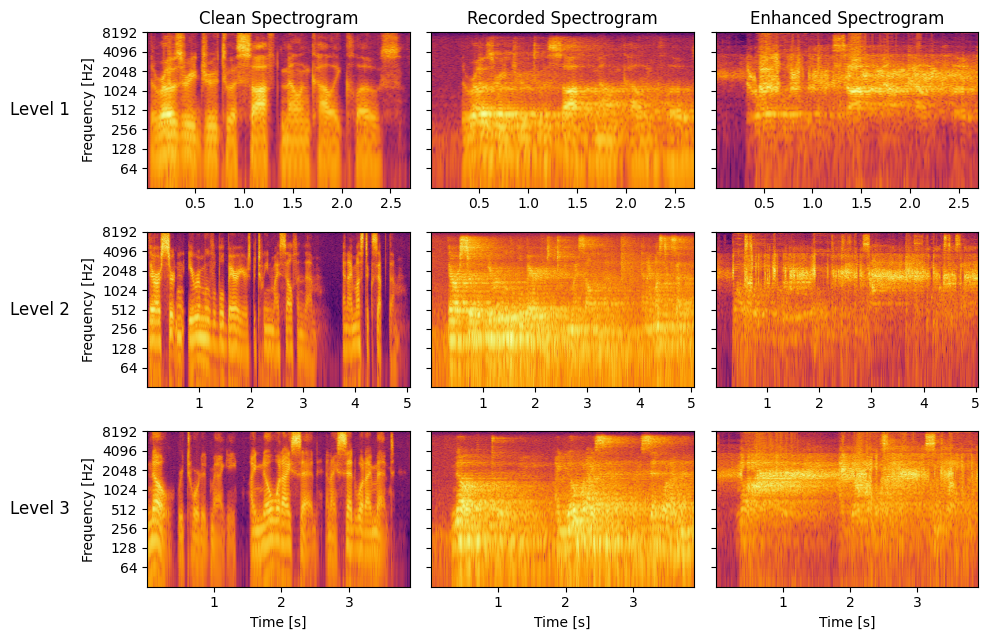

In [36]:
from matplotlib.ticker import ScalarFormatter


fig, axes = plt.subplots(3, 3, figsize=(10, 6.5), sharey=True)
base_path = "samples"


def plot_row(
    axes,
    clean_file,
    recorded_file,
    enhanced_file,
    task_label,
    first_row=False,
    last_row=False,
):
    # Calculate bounds
    clean_signal, recorded_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/reverb/{recorded_file}.wav")
    )
    row_nonzero = clean_signal.abs() > 0
    nonzero_indices = torch.nonzero(row_nonzero, as_tuple=False).squeeze()
    bounds = nonzero_indices[0, 1].item(), nonzero_indices[-1, 1].item()

    # Plot spectograms
    plot_spectrogram(axes[0], clean_signal[:, bounds[0] : bounds[1]])
    plot_spectrogram(axes[1], recorded_signal[:, bounds[0] : bounds[1]])

    _, enhanced_signal = load_file_pair(
        (f"{base_path}/clean/{clean_file}.wav", f"{base_path}/{enhanced_file}.wav")
    )
    plot_spectrogram(axes[2], enhanced_signal[:, bounds[0] : bounds[1]])

    axes[0].annotate(
        task_label,
        xy=(0, 0.5),
        xytext=(-axes[0].yaxis.labelpad - 5, 0),
        xycoords=axes[0].yaxis.label,
        textcoords="offset points",
        size="large",
        ha="right",
        va="center",
    )
    axes[0].set_ylabel("Frequency [Hz]")

    if first_row:
        axes[0].set_title("Clean Spectrogram")
        axes[1].set_title("Recorded Spectrogram")
        axes[2].set_title("Enhanced Spectrogram")

    if last_row:
        axes[0].set_xlabel("Time [s]")
        axes[1].set_xlabel("Time [s]")
        axes[2].set_xlabel("Time [s]")


plot_row(
    axes[0],
    "task_2_level_1_clean_001",
    "task_2_level_1_recorded_001",
    "generator_2/task_2_level_1_recorded_001",
    "Level 1",
    first_row=True,
)

plot_row(
    axes[1],
    "task_2_level_2_clean_003",
    "task_2_level_2_recorded_003",
    "generator_2/task_2_level_2_recorded_003",
    "Level 2",
)

plot_row(
    axes[2],
    "task_2_level_3_clean_001",
    "task_2_level_3_recorded_001",
    "generator_2/task_2_level_3_recorded_001",
    "Level 3",
    last_row=True,
)

for axis in axes.flatten():
    axis.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    axis.yaxis.set_major_formatter(ScalarFormatter())  # Use scalar formatter
    axis.yaxis.get_major_formatter().set_scientific(False) 
plt.tight_layout()

# fig.suptitle("Diffusion-SASEGAN Results for the Filtering Task", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for the suptitle
plt.show()